# Assignment 2:
   
Test whether a gaussian model N($\mu$, $\sigma$) for the age distribution of citibike drivers is a sensible model, or if you can find a better fit with another distribution.

Use 2 tests: KS, AD, KL, chisq (even though we have not talked about it in detail yet) to do this.

Test at the Normal and a least one other distributions (e.g. Poisson, or Binomial, or Chisq, Lognormal.......)

No skeleton: you are on your own!

Extra credit: Divide your sample geographically: by Borrow + split Manhattan in an Uptown and a Downtown sample (use your discretion to do so, but ZIP code is a good idea) and see if you notice any differences in how the age distribution can be modeled.

In [54]:
from __future__ import division, print_function
__author__ = 'LE XU, lx565 CUSP 2016'
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from pandas import Series, DataFrame
from getCitiBikeCSV import getCitiBikeCSV
np.random.seed(333)
import statsmodels.api as sm
import statsmodels
import scipy.stats

import pandas
%matplotlib inline
%pylab inline


dfdata = (os.environ.get('DFDATA'))
print (dfdata)

Populating the interactive namespace from numpy and matplotlib
/gws/open/NYCOpenData/nycopendata/data


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['shape', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [55]:
datestring = '201507'

In [56]:
datestring = '201507'
getCitiBikeCSV(datestring)

file in place, you can continue


In [57]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,732,7/1/2015 00:00:03,7/1/2015 00:12:16,489,10 Ave & W 28 St,40.750664,-74.001768,368,Carmine St & 6 Ave,40.730386,-74.002150,18669,Subscriber,1970.0,1
1,322,7/1/2015 00:00:06,7/1/2015 00:05:29,304,Broadway & Battery Pl,40.704633,-74.013617,3002,South End Ave & Liberty St,40.711512,-74.015756,14618,Subscriber,1984.0,1
2,790,7/1/2015 00:00:17,7/1/2015 00:13:28,447,8 Ave & W 52 St,40.763707,-73.985162,358,Christopher St & Greenwich St,40.732916,-74.007114,18801,Subscriber,1992.0,1
3,1228,7/1/2015 00:00:23,7/1/2015 00:20:51,490,8 Ave & W 33 St,40.751551,-73.993934,250,Lafayette St & Jersey St,40.724561,-73.995653,19137,Subscriber,1990.0,1
4,1383,7/1/2015 00:00:44,7/1/2015 00:23:48,327,Vesey Pl & River Terrace,40.715338,-74.016584,72,W 52 St & 11 Ave,40.767272,-73.993929,15808,Subscriber,1988.0,1


In [58]:
#df is the dataframe where the content of the csv file is stored
df['age'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber')]

In [59]:
#dropping some data I no longer need
#... your code here...
df["age"].head()

0    45.0
1    31.0
2    23.0
3    25.0
4    27.0
Name: age, dtype: float64

In [60]:
# dropping NaN values
df['age'].dropna(inplace= True)


# KS and AD test for Normal


## Null hypothesis:  
$H0$: The age of riders that drawn from a population that follows a Normal distribution. 

#### alpha = 0.05


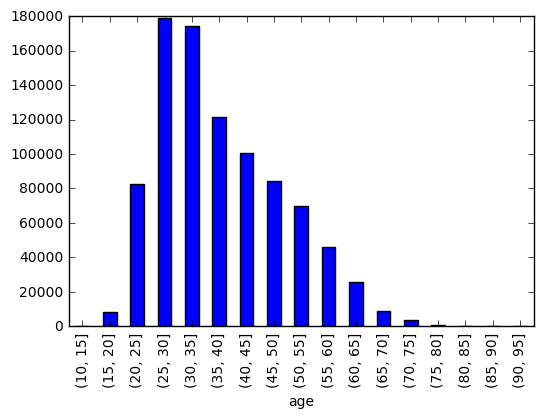

In [61]:
bins = np.arange(10, 99, 5)
ax = df.age.groupby(pd.cut(df.age, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)

In [62]:
# use the statsmodels package to see the result
statsmodels.stats.diagnostic.normal_ad(df.age, axis=0)

(13805.856181447394, 0.0)

In [63]:
# use the statsmodels package to see the result
statsmodels.stats.diagnostic.kstest_normal(df.age, pvalmethod='approx')

(0.10663088727174719, 0.0)

### Both p-value from KS, AD test are small, so the null hypothesis is rejected. Meaning the age of riders that drawn from a population that does not follow a Normal distribution.¶


###   

# KS test for Lognormal


### Null hypothesis: 
$H0$: The age of riders that drawn from a population that follows a Lognormal distribution. 
#### alpha = 0.05

In [64]:
scipy.stats.lognorm.fit?

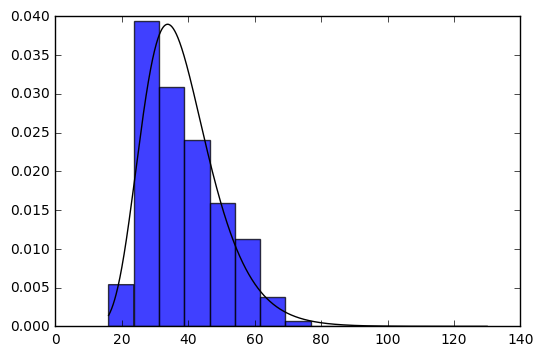

In [65]:
#generate the fitted log distribution

shape, loc, scale = scipy.stats.lognorm.fit(df.age, floc=0)

plt.hist(df.age, bins=15, normed=True, color='b', alpha=0.75)
xmin = df.age.min()
xmax = df.age.max()
x = np.linspace(xmin, xmax, 1000)
pdf = scipy.stats.lognorm.pdf(x, shape, scale=scale)
plt.plot(x, pdf, 'k')




In [66]:
#For the two parameter lognormal distribution, the "mean" and "std dev" correspond to log(scale) and shape

print (" The estimated mean is %f and the estimated std is %f"%(np.log(scale), shape))

 The estimated mean is 3.604202 and the estimated std is 0.290374


In [67]:
#ks test with 
scipy.stats.kstest(df.age,"lognorm", args =(np.log(scale), shape))

KstestResult(statistic=0.79058686139021217, pvalue=0.0)

In [74]:
#log_norm = lambda x : scipy.stats.lognorm(x, np.log(scale), shape)

## AD test for Exponential

### Null hypothesis: 
$H0$: The age of riders that drawn from a population that follows an Exponential distribution. 
#### alpha = 0.05

In [75]:
scipy.stats.expon.fit?

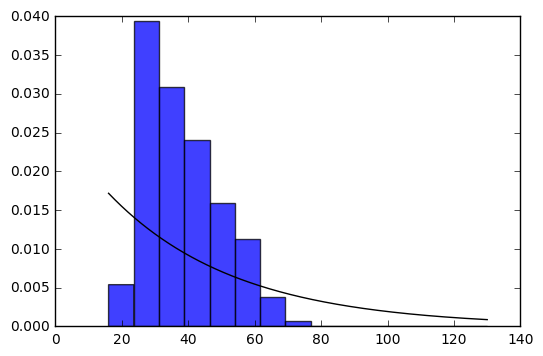

In [70]:
loc, scale = scipy.stats.expon.fit(df.age, floc=0)

plt.hist(df.age, bins=15, normed=True, color='b', alpha=0.75)
xmin = df.age.min()
xmax = df.age.max()
x = np.linspace(xmin, xmax, 1000)
pdf = scipy.stats.expon.pdf(x, loc, scale)
plt.plot(x, pdf, 'k')

In [71]:
loc

0

In [72]:
scale

38.351660156250063

In [73]:
scipy.stats.kstest(df.age,"expon",args=(loc,scale)) 

KstestResult(statistic=0.42698400246340695, pvalue=0.0)

# In Sum, from all the test we did, the P value we get is 0.  So we conclude that the age of riders that drawn from a population does not follow the Lognormal and Exponential distribution  